### Residual analyses with simulated ruptures

In [2]:
import numpy as np
import importlib
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

modelname ='welBbatt'

xdmfFilename='/Users/DuoL/Documents/NSHM/Central/crustal/GMs/'+modelname+'-GME-surface.xdmf'



In [85]:
# plot distance decay plot
import FigFunc.calc_variability2
from FigFunc.plot_gme_curve_v8 import plot_gme_curve_atk22

from FigFunc.plot_gme_curve_v122 import plot_gme_curve_2d
from FigFunc.plot_gme_curve_mean_std_v20 import plot_gme_curve_mean_std

## Two load_gm_data functions: crust and interface

importlib.reload(FigFunc.calc_variability2)
from FigFunc.calc_variability2 import load_gm_data_crust, calc_gm_variability


rootfolder = '/Users/DuoL/Documents/NSHM/Central/'

datafile = rootfolder + 'GMMs/Atkinson2022Crust_m72.csv'
gmTable = pd.read_csv(datafile)

figsize_single=(5,5)

modelname ='welBbatt'

xdmfFilename='/Users/DuoL/Documents/NSHM/Central/crustal/GMs/'+modelname+'-GME-surface.xdmf'

# datafile = rootfolder + 'GMMs/sheet/atk22_mw8p32_sa1_v2.csv'
# gmTable = pd.read_csv(datafile)

# datafile2 = rootfolder + 'GMMs/sheet/ag20_mw8p32_sa1_v2.csv'
# gmTable2 = pd.read_csv(datafile2)

pga,pgv,sa1,sa3,depi,rjb1 = load_gm_data_crust(xdmfFilename)

rrup =np.array(rjb1)

# plot_gme_curve_mean_std(modelname, gmTable,rrup, sa1,sa3,figsize_single,imd='sa1')

plot_gme_curve_mean_std(modelname, gmTable,rrup,sa1,sa3,sa1,figsize_single, imd='sa3')
# plot_gme_curve(modelname, gmTable,sa0_3,rjb, imd='sa0_3')

(49602, 3) (98692, 3)


In [6]:
from openquake.hazardlib import gsim

from openquake.hazardlib.gsim.nz22 import atkinson_2022
gsim = atkinson_2022.Atkinson2022SInter()

# gsim = nz_nshm2022_abrahamson_gulerce_2020.NZNSHM2022_AbrahamsonGulerce2020SSlab()

print("Sites:", gsim.REQUIRES_SITES_PARAMETERS)                 
print("Rupture:", gsim.REQUIRES_RUPTURE_PARAMETERS)
print("Dists:", gsim.REQUIRES_DISTANCES)                                                                                                                                       
                                                                                                     

Sites: frozenset({'vs30'})
Rupture: frozenset({'mag'})
Dists: frozenset({'rrup'})


In [109]:
# synthetic pooints
xmin, xmax, ymin, ymax = 1.68e+06, 1.88e+06,5.33e+06 , 5.5e+06


dx = 10000
xgrid = np.arange(xmin, xmax, dx)
ygrid = np.arange(ymin, ymax, dx)

xsyn, ysyn = np.meshgrid(xgrid, ygrid)

xsyn = xsyn.reshape(len(xsyn.flatten()),1)
ysyn = ysyn.reshape(len(xsyn.flatten()),1)
zsyn = np.full(len(xsyn.flatten()),0.0)

print(xsyn.shape, zsyn.shape)

df_synTable = pd.DataFrame({
    'x': xsyn[:,0],
    'y': ysyn[:,0],
    'z': zsyn[:,],
})

print(df_synTable.keys())


(340, 1) (340,)
Index(['x', 'y', 'z'], dtype='object')


In [134]:
# create gm table      
# siteTable=pd.read_csv('siteTable_xy.csv')
# print(siteTable.keys())

df_synTable['Vs30'] = np.full(len(xsyn),1000)
df_synTable['sta'] = np.linspace(0,len(xsyn),len(xsyn))

import FigFunc.calc_variability2
importlib.reload(FigFunc.calc_variability2)
from FigFunc.calc_variability2 import prepare_gm_table_from_model

# model_list = ['welA','welBb','welBbatt','welC','welCatt','welEb200','welEbasin','welEbasinAtt']
# mw_list = [7.08,7.16,7.16,7.18,7.18,7.17,7.11,7.11]

df_crt= pd.read_csv('/Users/DuoL/Documents/NSHM/PyScripts/GMs/df_gme_hik.csv')
model_list = df_crt['model'].to_list()
mw_list = df_crt['Mw'].to_list()

# modelname ='welC'
# mag1=7.16

# affect Rrup an Rjb
interface_flag=True

for im,modelname in enumerate(model_list):

    xdmfFilename='/Volumes/heiterwange/NSHM/Hikurangi/GMs/' + modelname +'-GME-surface.xdmf'

    
    df_event1 = prepare_gm_table_from_model(site_table=df_synTable,xdmfFilename=xdmfFilename,modelname=modelname,mag=mw_list[im],interface_flag=interface_flag)

    df_event1.to_csv('GMs/synstations2/gmtable-'+modelname+'.csv')
    print(df_event1['pSA_3.0'].max(),df_event1['pSA_1.0'].max())
   

(505008, 3) (168336, 3)
Index(['pSA_1.0', 'pSA_3.0', 'PGA', 'r_jb', 'r_rup', 'evid', 'mag', 'sta',
       'Vs30'],
      dtype='object')
0.6418753615444376 0.278459515915094
(505008, 3) (168336, 3)
Index(['pSA_1.0', 'pSA_3.0', 'PGA', 'r_jb', 'r_rup', 'evid', 'mag', 'sta',
       'Vs30'],
      dtype='object')
0.37359505315024566 1.3633187145685934
(505008, 3) (168336, 3)
replaced by SA 2.0
Index(['pSA_1.0', 'pSA_3.0', 'PGA', 'r_jb', 'r_rup', 'evid', 'mag', 'sta',
       'Vs30'],
      dtype='object')
0.6538885438187765 1.2948140349522241
(505008, 3) (168336, 3)
Index(['pSA_1.0', 'pSA_3.0', 'PGA', 'r_jb', 'r_rup', 'evid', 'mag', 'sta',
       'Vs30'],
      dtype='object')
0.2966018454984089 0.9187546948508464
(505008, 3) (168336, 3)
Index(['pSA_1.0', 'pSA_3.0', 'PGA', 'r_jb', 'r_rup', 'evid', 'mag', 'sta',
       'Vs30'],
      dtype='object')
0.38705425020890777 0.6611724821357893
(505008, 3) (168336, 3)
Index(['pSA_1.0', 'pSA_3.0', 'PGA', 'r_jb', 'r_rup', 'evid', 'mag', 'sta',
      

In [136]:
df_synTable['Vs30'] = np.full(len(xsyn),1000)

print(df_event1['r_jb'].max(),df_event1['Vs30'].max(), df_event1['r_rup'].__len__())


79.29449588653414 600 340


In [137]:
# create residual table

importlib.reload(FigFunc.calc_variability2)
from FigFunc.calc_variability2 import prepare_resid_table_at22interface


df_crt= pd.read_csv('/Users/DuoL/Documents/NSHM/PyScripts/GMs/df_gme_hik.csv')
model_list = df_crt['model'].to_list()
mw_list = df_crt['Mw'].to_list()


for im,modelname in enumerate(model_list):

    df_event1 = pd.read_csv('GMs/synstations/gmtable-'+modelname+'.csv')

    df_event1['Vs30'] = np.full(df_event1.__len__(),1000)

    df_e1_resid = prepare_resid_table_at22interface(df_event1)

    print(df_e1_resid['resid_PGA'].max(),df_e1_resid['resid_PGA'].min())
    
    df_e1_resid.to_csv('GMs/synstations2/resid-'+ modelname+ '.csv')

df_all_resid = pd.read_csv('GMs/synstations2/resid-'+ model_list[0] + '.csv')

for im,modelname in enumerate(model_list[1::]):
    df_e1_resid=pd.read_csv('GMs/synstations2/resid-'+ modelname + '.csv')
    df_all_resid=pd.concat([df_all_resid,df_e1_resid])

df_all_resid.to_csv('GMs/synstations2/all_interface_resid.csv')

Sites: frozenset({'vs30'})
Rupture: frozenset({'mag'})
Dists: frozenset({'rrup'})
Done! Residuals added to df_sel
-0.0825396474208937 -1.9434872575569955
Sites: frozenset({'vs30'})
Rupture: frozenset({'mag'})
Dists: frozenset({'rrup'})
Done! Residuals added to df_sel
1.211646735735304 -2.299630500732865
Sites: frozenset({'vs30'})
Rupture: frozenset({'mag'})
Dists: frozenset({'rrup'})
Done! Residuals added to df_sel
1.5791358174799672 -1.7120223478772694
Sites: frozenset({'vs30'})
Rupture: frozenset({'mag'})
Dists: frozenset({'rrup'})
Done! Residuals added to df_sel
0.8118241158435368 -2.4087000704706134
Sites: frozenset({'vs30'})
Rupture: frozenset({'mag'})
Dists: frozenset({'rrup'})
Done! Residuals added to df_sel
-0.039999482705681544 -2.734280052890792
Sites: frozenset({'vs30'})
Rupture: frozenset({'mag'})
Dists: frozenset({'rrup'})
Done! Residuals added to df_sel
-0.4099740483209251 -4.583538147593718
Sites: frozenset({'vs30'})
Rupture: frozenset({'mag'})
Dists: frozenset({'rrup'})

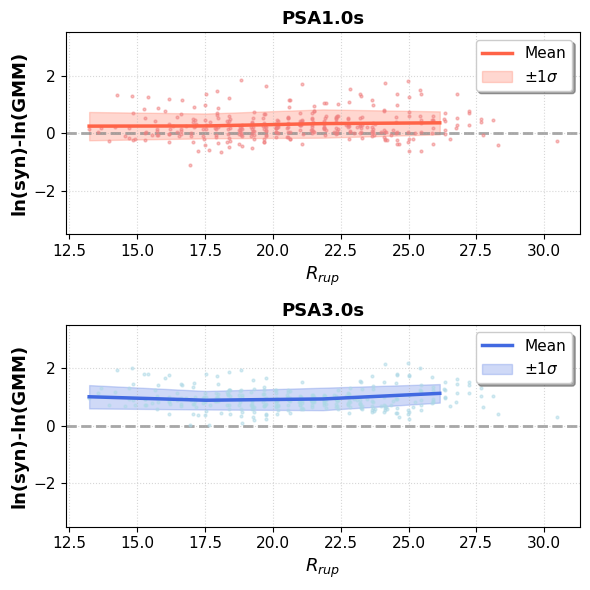

In [142]:

import GMfunc.plot_pga_gmpe
importlib.reload(GMfunc.plot_pga_gmpe)
from GMfunc.plot_pga_gmpe import bin_mean_std, bin_mean_err


## seperate or entire data

modelname = 'jp3yC'
df_all_resid = pd.read_csv('GMs/synstations2/resid-'+modelname +'.csv')

nbins = 5
mean_bin, std_bins, rhypo_bins = bin_mean_std(nbins, 10**df_all_resid['resid_pSA_1.0'].values, df_all_resid['r_rup'].values)  

# figname = 'resid-'+modelname+'.png'
figname = 'resid-hik-syn2-'+modelname+'.png'

fig, axes = plt.subplots(2, 1, figsize=(6, 6))

# First subplot - Magnitude dependency
axes[0].plot(df_all_resid['r_rup'], df_all_resid['resid_pSA_1.0'], '.', alpha=0.5, color='lightcoral', markersize=4)

axes[0].plot(rhypo_bins, mean_bin, '-', color='tomato', linewidth=2.5, label='Mean', zorder=5)
axes[0].fill_between(rhypo_bins, mean_bin - std_bins, mean_bin + std_bins, color='tomato', alpha=0.25, label=r'$\pm 1\sigma$')

axes[0].set_xlabel(r'$R_{rup}$', fontsize=13, fontweight='bold')
axes[0].set_ylabel(r'ln(syn)-ln(GMM)', fontsize=13, fontweight='bold')
axes[0].set_title(r'PSA1.0s', fontsize=13, fontweight='bold')

axes[0].legend(loc='best', frameon=True, shadow=True, fontsize=11)
axes[0].set_ylim([-3.5, 3.5])
axes[0].axhline(y=0, xmin=0, xmax=1, linewidth=2, color='gray', linestyle='--', alpha=0.7, zorder=1)
axes[0].grid(which='both', linestyle=':', alpha=0.5)
axes[0].tick_params(axis='both', which='major', labelsize=11)

# PSA3.0 s

mean_bin, std_bins, rhypo_bins = bin_mean_std(nbins, 10**df_all_resid['resid_pSA_3.0'].values, df_all_resid['r_rup'].values)  

axes[1].plot(df_all_resid['r_rup'], df_all_resid['resid_pSA_3.0'], '.', alpha=0.5, color='lightblue', markersize=4)

axes[1].plot(rhypo_bins, mean_bin, '-', color='royalblue', linewidth=2.5, label='Mean', zorder=5)
axes[1].fill_between(rhypo_bins, mean_bin - std_bins, mean_bin + std_bins, color='royalblue', alpha=0.25, label=r'$\pm 1\sigma$')

axes[1].set_xlabel(r'$R_{rup}$', fontsize=13, fontweight='bold')
axes[1].set_ylabel(r'ln(syn)-ln(GMM)', fontsize=13, fontweight='bold')
axes[1].set_title(r'PSA3.0s', fontsize=13, fontweight='bold')

axes[1].legend(loc='best', frameon=True, shadow=True, fontsize=11)
axes[1].set_ylim([-3.5, 3.5])
axes[1].axhline(y=0, xmin=0, xmax=1, linewidth=2, color='gray', linestyle='--', alpha=0.7, zorder=1)
axes[1].grid(which='both', linestyle=':', alpha=0.5)
axes[1].tick_params(axis='both', which='major', labelsize=11)


# # PSA 0.3 s
# mean_bin, std_bins, rhypo_bins = bin_mean_std(nbins, 10**df_all_resid['resid_pSA_0.3'].values, df_all_resid['r_rup'].values)  

# axes[2].plot(df_all_resid['r_rup'], df_all_resid['resid_pSA_0.3'], '.', alpha=0.5, color='lightblue', markersize=4)

# axes[2].plot(rhypo_bins, mean_bin, '-', color='royalblue', linewidth=2.5, label='Mean', zorder=5)
# axes[2].fill_between(rhypo_bins, mean_bin - std_bins, mean_bin + std_bins, color='royalblue', alpha=0.25, label=r'$\pm 1\sigma$')

# axes[2].set_xlabel(r'$R_{rup}$', fontsize=13, fontweight='bold')
# axes[2].set_ylabel(r'ln(obv)-ln(GMM)', fontsize=13, fontweight='bold')
# axes[2].set_title(r'PSA0.3s', fontsize=13, fontweight='bold')

# axes[2].legend(loc='best', frameon=True, shadow=True, fontsize=11)
# axes[2].set_ylim([-3.5, 3.5])
# axes[2].axhline(y=0, xmin=0, xmax=1, linewidth=2, color='gray', linestyle='--', alpha=0.7, zorder=1)
# axes[2].grid(which='both', linestyle=':', alpha=0.5)
# axes[2].tick_params(axis='both', which='major', labelsize=11)


plt.tight_layout()
plt.savefig(figname, dpi=300, bbox_inches='tight')
plt.show()



In [126]:
# coastfile = rootfolder + '../Geometry/nzcoast_xyz.csv'
# coast_table = pd.read_csv(coastfile)
print(coast_table['Points:0'].max())

2092193.49


(505008, 3) (168336, 3)


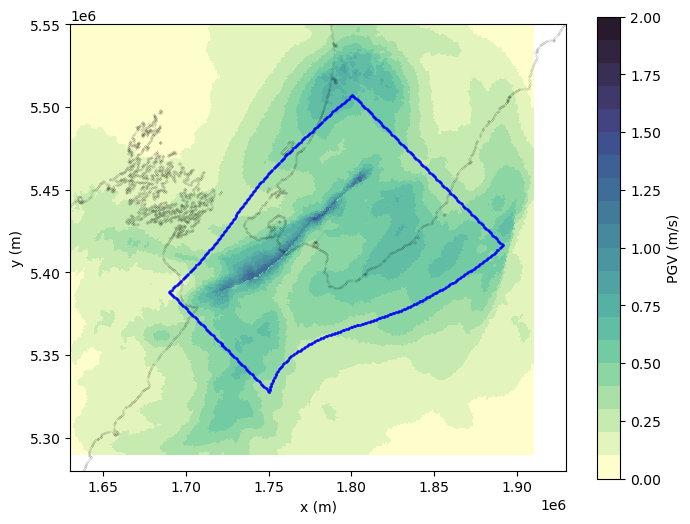

In [129]:
import FigFunc.load_surf_gm14
importlib.reload(FigFunc.load_surf_gm14)
from FigFunc.load_surf_gm14 import load_surf_gm_slab


from palettable.cmocean import sequential as cmapb
from matplotlib.colors import ListedColormap

Cmap2 = ListedColormap(cmapb.Deep_20.mpl_colors)
Cmap2

hikfile = rootfolder + '/slab_hik_edge.csv'
hik_trace  = pd.read_csv(hikfile)

modelname = 'jp3yE'

xdmfFilename = rootfolder +'Joint3/GMs/' + modelname +'-GME-surface.xdmf'
pga,pgv,sa1,sa3,triang,depi,rjb = load_surf_gm_slab(xdmfFilename)

figsize_single = (8,6)

fig,ax0 = plt.subplots(nrows=1,ncols=1,figsize=(figsize_single))

#ax0.set_title('Mapview of Td0')
sc = ax0.tripcolor(triang,pgv,cmap=Cmap2, shading='flat',vmin=0,vmax=2.)

ax0.plot(coast_table['Points:0'],coast_table['Points:1'],'.k',markersize=0.03)
# ax0.plot(df_synTable['x'],df_synTable['y'],'^',color='violet',markersize=4.2)
ax0.plot(hik_trace['Points:0'],hik_trace['Points:1'],'.',c='blue',alpha=0.7,markersize=2.5)
ax0.plot(hik_trace['Points:0'][0:1],hik_trace['Points:1'][0:1],'-',c='blue',alpha=0.7,label='Hikurangi slab',markersize=2.5)


ax0.set_aspect(1)
ax0.set_aspect(1)
ax0.set_xlabel('x (m)')
ax0.set_ylabel('y (m)')
cl = fig.colorbar(sc,ax=ax0)
cl.set_label('PGV (m/s)')

ext= 50e3
ax0.set_xlim([xmin-ext,xmax+ext])
ax0.set_ylim([ymin-ext,ymax+ext])

outname = modelname+'-pgv.png'
plt.savefig(outname,dpi=300,transparent=False)
plt.show()

In [132]:
hik_trace['Points:2'].min()

-30000

In [1]:
## residual linear regression

import os
import sys

# Set R_HOME to your Homebrew R installation
os.environ['R_HOME'] = '/opt/homebrew/Cellar/r/4.5.1/lib/R'

# Set library paths for LAPACK/BLAS
os.environ['R_LD_LIBRARY_PATH'] = '/opt/homebrew/Cellar/r/4.5.1/lib/R/lib'

# Add to dynamic library path (for macOS)
os.environ['DYLD_LIBRARY_PATH'] = '/opt/homebrew/Cellar/r/4.5.1/lib/R/lib:/opt/homebrew/Cellar/openblas/0.3.30/lib'

# Also set LD_LIBRARY_PATH (backup)
os.environ['LD_LIBRARY_PATH'] = '/opt/homebrew/Cellar/r/4.5.1/lib/R/lib:/opt/homebrew/Cellar/openblas/0.3.30/lib'

print("✓ R environment configured")
print(f"  R_HOME: {os.environ['R_HOME']}")
print(f"  R_LD_LIBRARY_PATH: {os.environ['R_LD_LIBRARY_PATH']}")



✓ R environment configured
  R_HOME: /opt/homebrew/Cellar/r/4.5.1/lib/R
  R_LD_LIBRARY_PATH: /opt/homebrew/Cellar/r/4.5.1/lib/R/lib


In [3]:
import pandas as pd
from StatsModel.mixed_effect_analy import fit_lmer_event_site , fit_mixed_model_event_station

psa_list = ['resid_PGA','resid_pSA_0.3',
            'resid_pSA_1.0','resid_pSA_3.0']
ped_list=[0.0,0.3,1.0,3.0]

loadfile='GMs/all_welmodel_resid.csv'
df_resd = pd.read_csv(loadfile)

deltaB_list = []
deltaS2S_list = []
deltaWS_list = []
bias_list = []

for ipsa,psa in enumerate(psa_list):

    # sub table for a single component    
    df_single_all = pd.DataFrame({
        'event_id': df_resd['evid'],
        'site_id': df_resd['sta'],
        'resid': df_resd[psa],
    })


    # check event number and site number, respectively

    event_counts = df_single_all['event_id'].value_counts()
    site_counts = df_single_all['site_id'].value_counts()
    

    print('difference in number of events:', event_counts.__len__() )

    # df_resd['event_id'] = df_single['event_id'].astype(str)
    # df_resd['site_id'] = df_single['site_id'].astype(str)
    df_single_all['lnY'] = df_single_all['resid'].astype(float)

    # res = method_4_sequential_fitting(df_single)

    res = fit_lmer_event_site(df_single_all,y='lnY',event="event_id", site="site_id", 
                                       )

    bias_list.append( res['bias'])
    deltaB_list.append( res['tau'])
    deltaS2S_list.append(res['phi_s2s'])
    deltaWS_list.append( res['phi'])

    # res['df_components'].to_csv(output_dir+'/M5reg-'+ psa + '-'+ modelname + appendix +'.csv')


df_sigma = pd.DataFrame({
    "record_name": psa_list,
    "period": ped_list,
    "mu": bias_list,
    "tau": deltaB_list,
    "phiSS": deltaS2S_list,
    "phiWS": deltaWS_list,
})


difference in number of events: 8
difference in number of events: 8
difference in number of events: 8
difference in number of events: 8


In [5]:
dlen = deltaB_list.__len__()

df_sigma = pd.DataFrame({
    "record_name": psa_list[0:dlen],
    "period": ped_list[0:dlen],
    "mu": bias_list[0:dlen],
    "tau": deltaB_list[0:dlen],
    "phiSS": deltaS2S_list[0:dlen],
    "phiWS": deltaWS_list[0:dlen],
})

df_sigma.to_csv('crust-sigma' +'.csv')


psa_list = psa_list[0:dlen]
ped_list = ped_list[0:dlen]

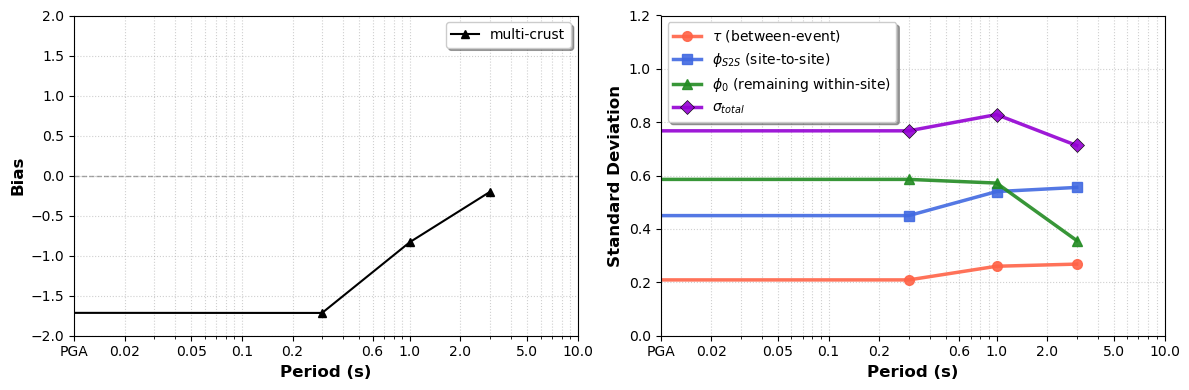

In [ ]:

modelname='crust'


In [ ]:
from StatsModel.spectral_decay import simple_spectral_decay

# Basic usage - analyzes first numeric column          
decay_exp, r2 = simple_spectral_decay('your_data.csv')

# Specify column and sampling rate
decay_exp, r2 = simple_spectral_decay('data.csv', 
                                     column_name='acceleration',
                                     sampling_rate=100)

# Fit specific frequency range
decay_exp, r2 = simple_spectral_decay('data.csv',
                                     sampling_rate=50,
                                     freq_range=(1, 25))  # 1-25 Hz

In [37]:

10**9.5 *0.005/1e9

0.0158113883008419

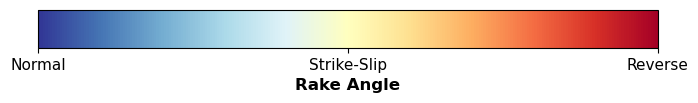

In [75]:
# Create standalone colorbar for rake angle
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(8, 1))
fig.subplots_adjust(bottom=0.5)

# Create colormap for rake angle range -90 to 90
cmap = plt.cm.RdYlBu_r  # You can change this to any colormap you prefer
norm = mpl.colors.Normalize(vmin=-90, vmax=90)

# Create the colorbar
cb = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, 
                                orientation='horizontal')

# Set custom tick positions and labels
cb.set_ticks([-90, 0, 90])
cb.set_ticklabels(['Normal', 'Strike-Slip', 'Reverse'])

# Set label
cb.set_label('Rake Angle', fontsize=12, fontweight='bold')

# Increase tick label size
ax.tick_params(labelsize=11)

plt.savefig('rake_angle_colorbar.png', dpi=300, bbox_inches='tight')
plt.show()

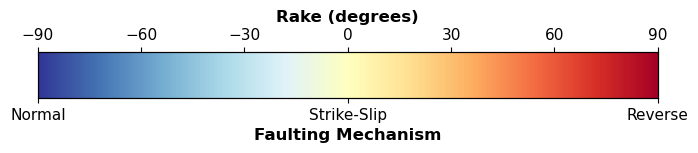

In [77]:
# Create standalone colorbar for rake angle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

fig, ax = plt.subplots(figsize=(8, 1.2))
fig.subplots_adjust(bottom=0.5)

# Create colormap for rake angle range -90 to 90
cmap = plt.cm.RdYlBu_r  # You can change this to any colormap you prefer
norm = mpl.colors.Normalize(vmin=-90, vmax=90)

# Create the colorbar
cb = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, 
                                orientation='horizontal')

# Set custom tick positions and labels on the bottom
cb.set_ticks([-90, 0, 90])
cb.set_ticklabels(['Normal', 'Strike-Slip', 'Reverse'])

# Set label on the bottom
cb.set_label('Faulting Mechanism', fontsize=12, fontweight='bold')

# Increase tick label size
ax.tick_params(labelsize=11)

# Add a second axis on top with numerical rake values
ax2 = ax.twiny()
ax2.set_xlim(-90, 90)
ax2.set_xticks(np.arange(-90, 91, 30))  # Ticks every 30 degrees
ax2.set_xlabel('Rake (degrees)', fontsize=12, fontweight='bold')
ax2.tick_params(labelsize=11)

plt.savefig('rake_angle_colorbar.png', dpi=300, bbox_inches='tight')
plt.show()